# Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Carga del dataset `diamonds` de Seaborn
2. Un **análisis exploratorio** preliminar para los datos
3. Se crean visualizaciones con:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizacion de `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Utilizacion de `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajuste de los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [6]:
#1. Carga del dataset diamonds de Seaborn.

diamantes = sns.load_dataset('diamonds')

In [7]:
# 2. Análisis exploratorio preliminar para los datos.

# Muestra las primeras filas del DataFrame.
print(diamantes.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [8]:
# Dimensiones del DataFrame.
print(diamantes.shape)

(53940, 10)


In [9]:
# Información sobre los tipos de datos y valores faltantes.
print(diamantes.info)

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>


In [10]:
# Estadísticas descriptivas.
diamantes.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [11]:
# Número de valores únicos por columna.
print(diamantes.nunique)

<bound method DataFrame.nunique of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>


In [12]:
# Verificar valores faltantes.
print(diamantes.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [13]:
# Porcentaje de valores faltantes por columna.
print(diamantes.isnull().mean() * 100)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64


In [14]:
# Eliminar filas duplicadas.
diamantes.drop_duplicates(inplace=True)
print(diamantes)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


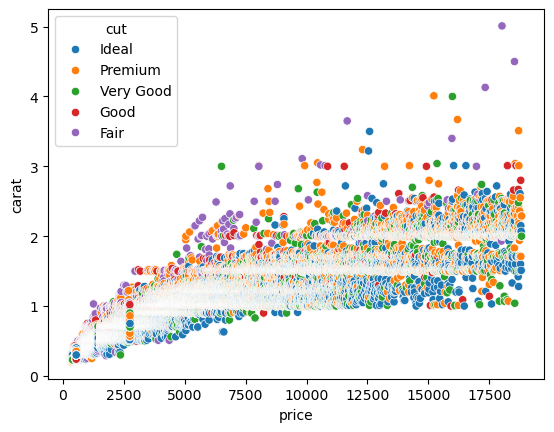

In [15]:
# 3. Creacion de visualizaciones

# Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
sns.scatterplot(data=diamantes,
               x='price',
               y='carat',
               hue='cut');

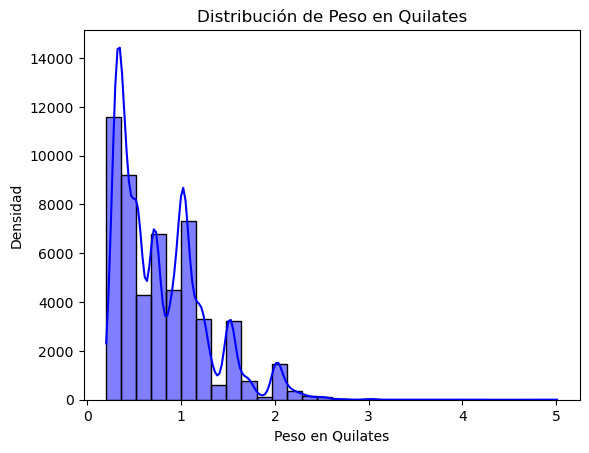

In [16]:
# Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)

sns.histplot(diamantes['carat'], kde=True, bins=30, color='blue')
plt.title('Distribución de Peso en Quilates')
plt.xlabel('Peso en Quilates')
plt.ylabel('Densidad')
plt.show()

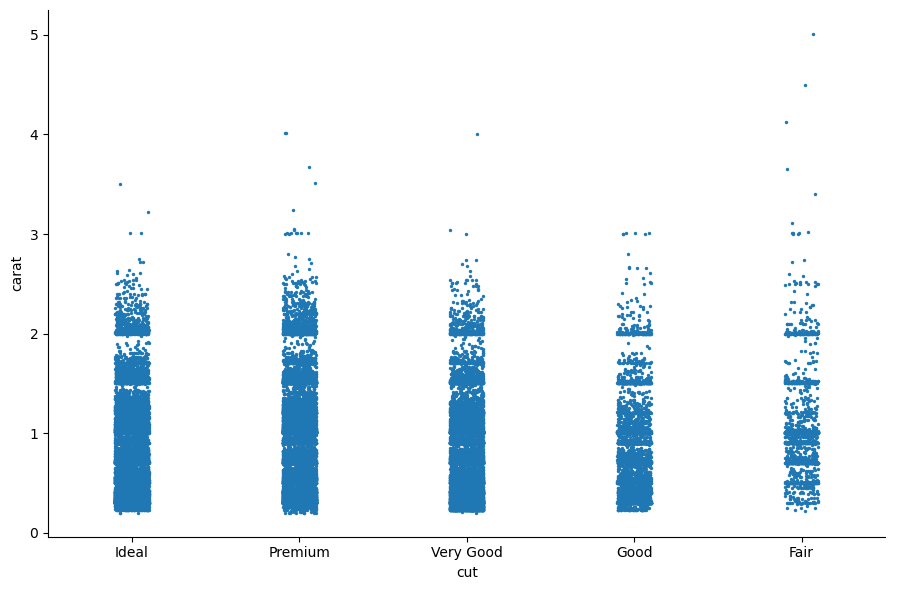

In [7]:
# Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
import seaborn as sns 

diamantes = sns.load_dataset('diamonds')

sns.catplot(data=diamantes,
           kind='strip',
           x='cut',
           y='carat',
           height=6,     
           aspect=1.5,
           s=6);

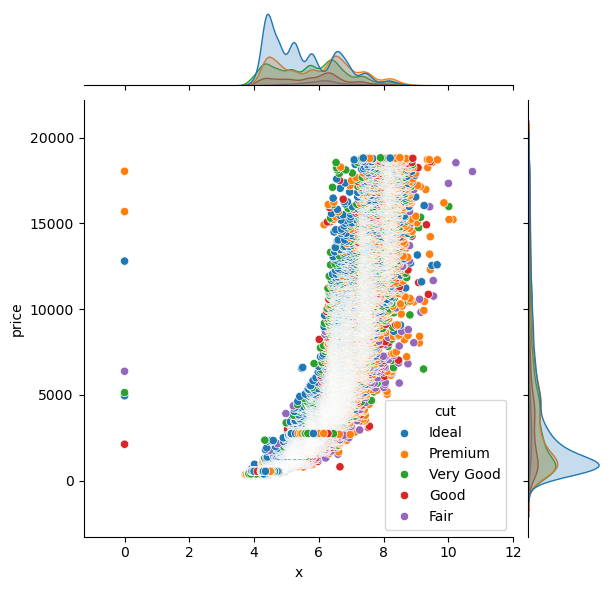

In [12]:
# Utilizacion de jointplot() para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional.

sns.jointplot(data=diamantes,
             x='x',
             y='price',
             hue='cut',
             maker='x');